# Lab 5 Constructing CNNs with Keras

In this lab, we will look at constructing convolutional networks with Keras. Keras drastically simplifies the process of constructing a network by using predefined network models and layers. 

After installing Keras via `pip install keras` restart your kernel. We will start by building a multilayer perceptron, and then move on to CNNs. Our first data set will be our old friend the MNIST dataset. Lets build a perceptron with one deep layer:

<img width = 500 src = "https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png">

We will use this to classify the MNIST dataset. First, we load in MNIST, normalize the X pixel intensities to be between 0 and 1 (this works better with our activation functions) and then encode the labels $Y$ as one-hot encoded categorical variables. We use the `keras.utils` class to do the one-hot encoding, but you could use `pandas.get_dummies` as well.

This tutorial follows closely the excellent tutorials https://nextjournal.com/gkoehler/digit-recognition-with-keras and https://colab.research.google.com/github/csc-training/intro-to-dl/blob/master/day1/keras-mnist-mlp.ipynb#scrollTo=-fGvYAbhVADs

In [302]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras.utils import np_utils

## MNIST:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

NUM_LABELS = 10

## Normalize training data to be between 0 and 1, we have to typecast it as a float to do so.
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MNIST data loaded: train: 60000 test: 10000
x_train: (60000, 28, 28)
X_train: (60000, 784)
y_train: (60000,)
Y_train: (60000, 10)


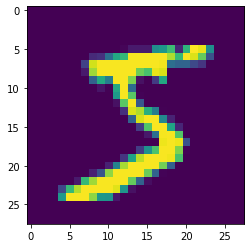

In [303]:
plt.imshow(x_train[0,:,:])

Recall that to build a sequential model in Keras we import the `sequential` class from `keras.model` and then the types of layers we will use from `keras.labels`. In this case we will be using __dense__ layer and __activation__ layers. 

We then define a new model with `model = Sequential()`. We add layers in sequence with `model.add(layer)` and Keras takes care of the connects for us:


<div class="alert alert-block alert-info">
__Dense__ implements the operation: __output = activation(dot(input, kernel) + bias)__ where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

[Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
</div>

## Build a sequential model in Keras

In [304]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(256, input_shape=(784,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Activation('softmax'))

That's it, we've constructed out model. To compile it we use `model.compile`. We will use the Adam optimizer, which automatically sets a different learning schedule for each weight. For more information about Adam, see [Jason Brownlee's excelent post](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) or [the original paper of Kingma and Ba](https://arxiv.org/abs/1412.6980). 

To train the model, use

`model.fit(X_train, Y_train,
          batch_size=, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))`

* `X_train` is the whole set of training data.
* `Y_train` is the whole set of label data.
* `batch_size` is size of each training minibatch. Remember that 1 is __stochastic gradient decent__ while 60000 (the size of the whole data set) would be __gradient decent__. 
* `verbose` sets how much information to output during fitting. 0 = silent, 1 = progress bar, 2 = one line per epoch.
* `validation_data=()` specifies data to validate on after each training epoch. 

We will save the output of the training in a variable called `history` for later viewing. 

https://keras.io/models/model/

In [305]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.5275 - accuracy: 0.8278 - val_loss: 0.3835 - val_accuracy: 0.8631
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3559 - accuracy: 0.8707 - val_loss: 0.3376 - val_accuracy: 0.8718
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3168 - accuracy: 0.8808 - val_loss: 0.3182 - val_accuracy: 0.8780
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2943 - accuracy: 0.8869 - val_loss: 0.3014 - val_accuracy: 0.8813
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2801 - accuracy: 0.8894 - val_loss: 0.3062 - val_accuracy: 0.8810
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2697 - accuracy: 0.8920 - val_loss: 0.2989 - val_accuracy: 0.8830
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2600 - accuracy: 0.8947 - val_loss: 0.2907 - val_accuracy: 0.8843
Epo

#### Saving weights with Keras

Unlike pure tensorflow, Keras will track the tensorflow session by default, including keeping the model alive in a session for us. To save out the weights, we use `model.save(FILE_NAME)`. The weights can be recovered by using `model.load_weights`. Be warned: you have to build a model with the same architecture first and then load the weights into it. 

In [306]:
# saving the model
import os

SAVE_DIR = "./"
MODEL_NAME = 'keras_mnist.h5'
model_path = os.path.join(SAVE_DIR, MODEL_NAME)

model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ./keras_mnist.h5 


#### Visualizing Training

Keras also saves the models training history. History store the training accuracy, the validation accuracy and the training loss and the validation loss. Below, we plot them against the epoch number

In [307]:
#history.history

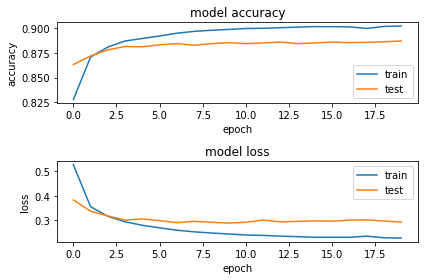

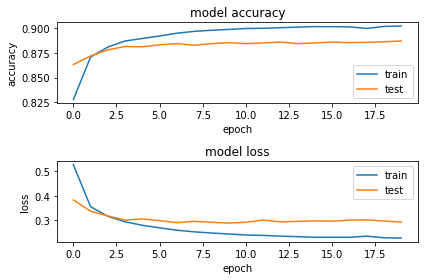

In [308]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# Convolutions

Before we start constructing a convolution network, lets take a moment to explore convolutions themselves to see what kinds of downstream layers our convolutions are creating. 



(427, 640, 3)


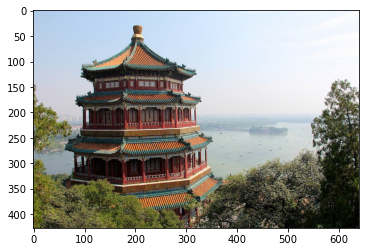

In [309]:
import numpy as np
from sklearn.datasets import load_sample_image
from matplotlib import pyplot as plt
import tensorflow as tf

china = load_sample_image("china.jpg") / 255
print(china.shape)

plt.imshow(china)

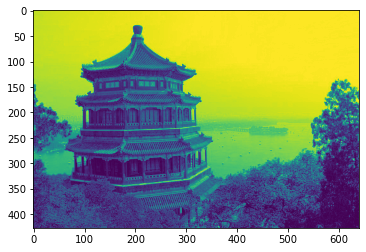

In [310]:
plt.imshow(china[:,:,2])

The picture we loaded is a color picture, and so has 3 channels (Red, Green, Blue). The shape tells us that the color channels are indexed by the third dimension of the array, and we can plot each channel separately:

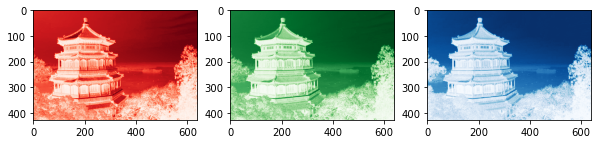

In [311]:
fig, axes = plt.subplots(1,3, figsize=(10, 5))

axes[0].imshow(china[:,:,0], cmap="Reds")
axes[1].imshow(china[:,:,1], cmap="Greens")
axes[2].imshow(china[:,:,2], cmap="Blues")

Given an $n\times m$ matrix $M$, a convolution passes over the image taking the dot product of each $n\times m$ rectangle with the weights of the matrix. 

<img width=600px src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L12Conv1.png">

Lets looks at some examples: The matrix 

$$
M= \left[
\begin{matrix}
0 &-1& 0
\\
0 & 0 & 0
\\
0&1&0
\end{matrix}
\right]
$$

is a horizontal edge detector, since the convolution of $M$ with a $3\times 3$ square of pixels is 0 if the intensity of the top central pixel is the same as the bottom. It only has a large value if the pixel intensity has changed drastically in the vertical direction. Given a convolution matrix like $M$, tensorflow's `tf.nn.conv2d` will compute the convolution for the entire image.

In [312]:
channels = 3
M = np.zeros([3,3,channels])
M[0,1,:] = -1
M[2,1,:] = 1
M

array([[[ 0.,  0.,  0.],
        [-1., -1., -1.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [ 0.,  0.,  0.]]])

In [313]:
channels = 3    # Since we're using RGB data

M = np.zeros([3,3,channels])

M[0,1,:] = -1     # Set the top ceter element to -1 for all 3 matricies
M[2,1,:] = 1      # Set the bottom ceter element to 1 for all 3 matricies
M[:,:,0]

array([[ 0., -1.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  1.,  0.]])

We will now use scipy's ndimage library to convolve the 3d image. There is of course a native tensorflow way to do this (or you could write your own convolve function, it's fairly straight forward) but for just looking, this is the simplest. 

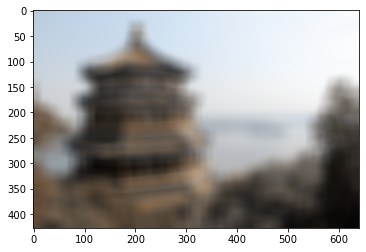

In [314]:
from scipy import ndimage

channels = 3
M = np.ones([30,30,channels])/(3*30*30)  # Bluring

conv = ndimage.filters.convolve(china, M)
plt.imshow(conv)

Similar to the vertical filter, a horizontal edge detector can be constructed from

$$
H= \left[
\begin{matrix}
0 &0& 0
\\
-1 & 0 & 1
\\
0&0&0
\end{matrix}
\right]
$$

Build out the edge detector below:

Edge detectors can also detect other kinds of features. For example, here is a $5\times 5$ angle detector:


$$
G= \left[
\begin{matrix}
0 &0& 0 & 0 & 0 
\\
0 &-1& -1 & -1 & -1 
\\
0 &-1& 1 & 1 & 1 
\\
0 &-1& 1 & 0 & 0 
\\
0 &-1& 1 & 0 & 0 
\end{matrix}
\right]
$$


[[ 0.  0.  0.  0.  0.]
 [ 0. -1. -1. -1. -1.]
 [ 0. -1.  1.  1.  1.]
 [ 0. -1.  1.  0.  0.]
 [ 0. -1.  1.  0.  0.]]


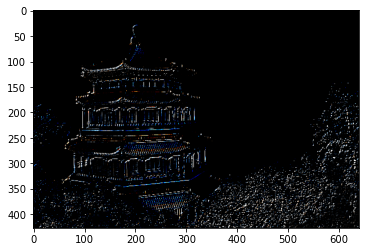

In [315]:
channels = 3    # Since we're using RGB data

G = np.zeros([5,5,channels])

G[1,1:5,:] = -1     
G[1:5,1,:] = -1     
G[2,2:5,:] = 1     
G[2:5,2,:] = 1 
print(G[:,:,0])

conv = ndimage.filters.convolve(china, G)
plt.imshow(conv)

And a Guassian blurring matrix:

$$
G = \left[\begin{matrix}
0.07& 0.13& 0.07\\ 
0.13& 0.20& 0.13\\
0.07& 0.13& 0.07
\end{matrix}\right]
$$

In [316]:
B = np.zeros([3,3,channels])
C = .25*np.array([0.07, 0.13, 0.07,
0.13, 0.20, 0.13,
0.07, 0.13, 0.07]).reshape(3,3)

B[:,:,0] = B[:,:,1] = B[:,:,2] = C

B[:,:,1]

array([[0.0175, 0.0325, 0.0175],
       [0.0325, 0.05  , 0.0325],
       [0.0175, 0.0325, 0.0175]])

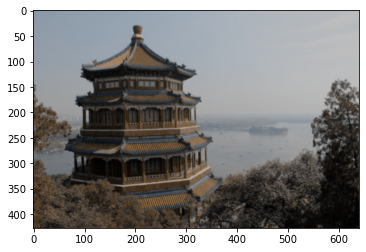

In [317]:
conv = ndimage.filters.convolve(china, B)
plt.imshow(conv)

# Convolutional Neural Networks

Lets try out our perceptron network on something a little more complicated. The fashion MNIST dataset has a very similar structure to MNIST except that instead of simple hand written digits it contains $28\times 28$ images of items of clothing:

<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png">

Here is a nonlinear 3 dimensional projection of the $28\times 28$ dimensional dataset using TSNE, courtesy of the datasets home repo (https://github.com/zalandoresearch/fashion-mnist)

 

We load it as below and process it with the same code as before. Take a moment to poke around the dataset before processing it, the labels are

Label|Description|Label|Description
--- | --- |--- | ---
0|T-shirt/top|5|Sandal
1|Trouser|6|Shirt
2|Pullover|7|Sneaker
3|Dress|8|Bag
4|Coat|9|Ankle boot

In [318]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

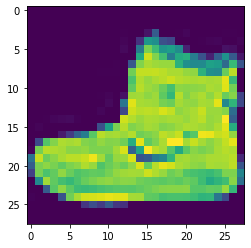

In [319]:
plt.imshow(x_train[0])

Processing the data:

In [320]:
NUM_LABELS = 10

## Normalize training data to be between 0 and 1, we have to typecast it as a float to do so.
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('x_train:', x_train.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MNIST data loaded: train: 60000 test: 10000
x_train: (60000, 28, 28)
X_train: (60000, 784)
y_train: (60000,)
Y_train: (60000, 10)


Now, try running the perceptron network about and note the validation error, you may need to increase the number of epochs to get reasonable results. 

In [321]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [322]:
model = Sequential()
model.add(Dense(256, input_shape=(784,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 1.3915 - accuracy: 0.5491 - val_loss: 1.3376 - val_accuracy: 0.5636
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 1.3163 - accuracy: 0.5698 - val_loss: 1.3147 - val_accuracy: 0.5704
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 1.2976 - accuracy: 0.5735 - val_loss: 1.3043 - val_accuracy: 0.5709
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 1.2882 - accuracy: 0.5752 - val_loss: 1.2997 - val_accuracy: 0.5748
Epoch 5/20
469/469 [==============================] - 4s 10ms/step - loss: 1.2777 - accuracy: 0.5780 - val_loss: 1.2909 - val_accuracy: 0.5760
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 1.2706 - accuracy: 0.5796 - val_loss: 1.2919 - val_accuracy: 0.5755
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 1.2655 - accuracy: 0.5806 - val_loss: 1.2877 - val_accuracy: 0.5742
Epo

#### Building a CNN

My error on the MLP never capped 82%, even with 100 epochs. Can we do better with a CNN? Recall that CNN's are comprised of stacks of convolution layers, activation layers, pooling layers and finally a flattening layer:

<table bgcolor="#fafafa"><tr>
    <td>__Convolution Layer__</td><td><img width=400 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L5ConvLayer.PNG">
    </tr>
    <td>__Pooling Layer__</td><td><img width=300 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L5PoolingLayer.PNG">
    </tr><tr>
    <td>__Flattening Layer__</td><td><img width=100 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L5FlatteningLayer.PNG">
    </tr></table>
    
A convolution layer is defined with    
    
    `Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape,
                 activation='relu')`
                 
Where

* `nb_filters` number of convolution filters.
* `kernel_size` size of each filter, say [5,5] for a $5\times 5$ filter.
* `padding` When we convolve, we tend to lower the image size. We can choose to pad the image back to its original size or not. 
* `input_shape` shape of the inputed training data, only required for the first layer. 
* `activation` the activation layer following the convolution layer. 

For a pooling layer we only specify the pool size:

* `MaxPooling2D(pool_size=pool_size)` where `pool_size = [2,2]` down-samples by 2 in each direction. 

After we down-sample enough, we flatten and feed the network into a dense layer to do the fitting. The final architecture looks like the cartoon from class:

<img width= 700 src="https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Labs/Lab%205/L12CNN2.PNG">

In [323]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D 

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## We renormalize the training data since we do not need to flatten it
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

## We have to add an extra dimension to allow for the multiple images we will be creating
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

## Construct CNN Network

In [324]:
## Construct Network
model = Sequential()
model.add(Conv2D(32, (7,7), padding = 'valid', input_shape=(28,28,1), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [325]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.layers import Conv2D 

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## We renormalize the training data since we do not need to flatten it
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

## We have to add an extra dimension to allow for the multiple images we will be creating
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

Now, lets create our model. Our convolution layers will have $3\times 3$ filters followed by downsampling.

In [326]:
model = Sequential()

model.add(Conv2D(32, (7,7),
                 padding='valid',
                 input_shape=(28, 28,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))




model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=NUM_LABELS, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 512)              

Lets fit, and plot the results. Each epoch will take 10-100 s depending on your processor. 

In [327]:
epochs = 5

history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 40s 83ms/step - loss: 0.7561 - accuracy: 0.7262 - val_loss: 0.5085 - val_accuracy: 0.8140
Epoch 2/5
469/469 [==============================] - 38s 82ms/step - loss: 0.5088 - accuracy: 0.8177 - val_loss: 0.4218 - val_accuracy: 0.8500
Epoch 3/5
469/469 [==============================] - 38s 82ms/step - loss: 0.4394 - accuracy: 0.8418 - val_loss: 0.3841 - val_accuracy: 0.8604
Epoch 4/5
469/469 [==============================] - 38s 82ms/step - loss: 0.4035 - accuracy: 0.8537 - val_loss: 0.3727 - val_accuracy: 0.8670
Epoch 5/5
469/469 [==============================] - 39s 83ms/step - loss: 0.3793 - accuracy: 0.8630 - val_loss: 0.3458 - val_accuracy: 0.8752


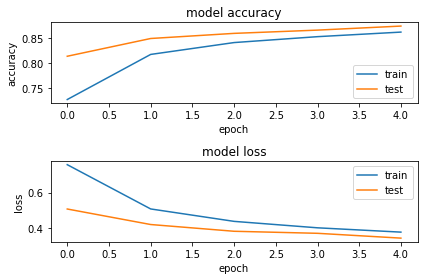

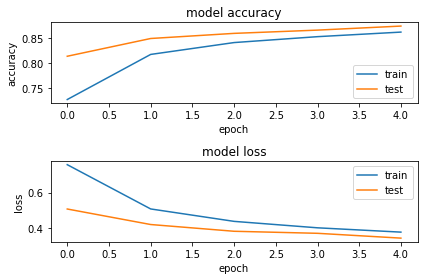

In [328]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

## Understanding the model

There are two things we would like to understand about a CNN: __what is it doing__ and __what is it not doing__? To answer the first question let open up the box a bit and see what the first few convolution kernels look like. 

The `model.layers[]` array gives a list of handlers for the model layers in the order given by summary. Note that you can also name your layers and call them that way. We then use `layer.get_weights()` to return the convolution and bias weights for each of the 32 kernel layers. 

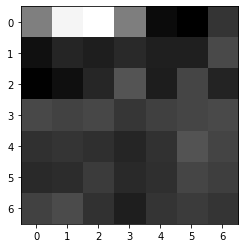

In [329]:
weights, biases = model.layers[0].get_weights()
plt.imshow(weights[:,:,0,1],cmap="Greys")

(7, 7, 1, 32)


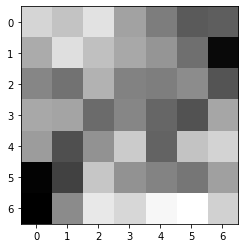

In [330]:
weights, biases = model.layers[0].get_weights()
print(weights.shape)

plt.imshow(weights[:,:,0,9],cmap="Greys")

#### Exercise:

Display all of the kernels in a grid. In addition, normalize the color scheme so that each image uses the same scheme. 

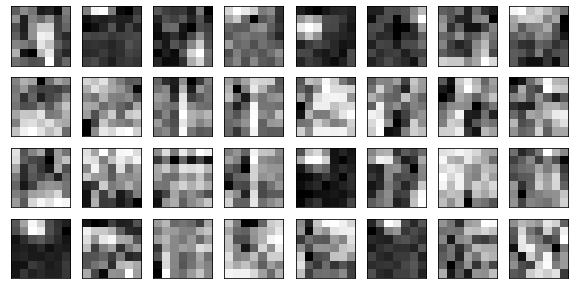

In [331]:
f, axes = plt.subplots(4,8, figsize=(10,5))

axes = axes.reshape(-1)
for i in range(32):
    axes[i].imshow(weights[:,:,0,i],cmap="Greys")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

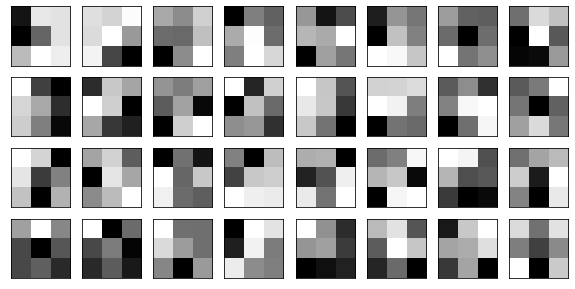

In [332]:
f, axes = plt.subplots(4,8, figsize=(10,5))

weights, biases = model.layers[2].get_weights()

axes = axes.reshape(-1)
for i in range(32):
    axes[i].imshow(weights[:,:,0,i],cmap="Greys")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

On the otherhand, its important to know what we're getting wrong. Lets construct the confusion matrix to discern which images the network has the hardest time classifying. 

Label|Description|Label|Description
--- | --- |--- | ---
0|T-shirt/top|5|Sandal
1|Trouser|6|Shirt
2|Pullover|7|Sneaker
3|Dress|8|Bag
4|Coat|9|Ankle boot

313/313 [==============================] - 3s 10ms/step


<AxesSubplot:>

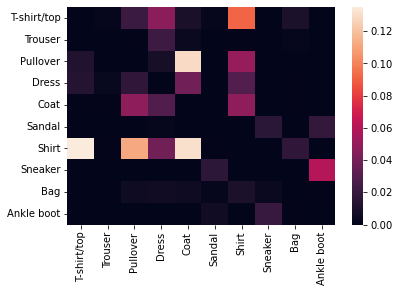

In [333]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_hat = np.argmax(model.predict(X_test),axis=1)
conf_mx = confusion_matrix(y_test, y_hat)

## Remove diagonal for better viewing
row_sum = conf_mx.sum(axis=1, keepdims=True)
nconf_mx = conf_mx/row_sum
np.fill_diagonal(nconf_mx,0)

labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

sns.heatmap(nconf_mx, xticklabels=labels, yticklabels=labels)

## Transfer Learning: Using Pretrained Models

This section is taken directly from the _Pretrained Models_ section of _Chapter 14_ of Geron. The code is mostly taken from the notebook accompanying Chapter 14. Please use that section as a companion to the code below. 

In this part of the  lab, we want to use the weights of a pretrained model to construct a new classifier. In this case, the pretrained model we will use is Xception model (https://arxiv.org/abs/1610.02357), with weights trained on the Imagenet dataset. We will use a data set of images of flowers from within tensorflow, and modify the output to classify flower types instead of the many label Imagenet categories. 

First, we load the flowers dataset from the Tensorflow datasets library `tensorflow_datasets`. If you do not already have this library, you may need to install it using `pip install tensorflow_datasets` from the anaconda prompt. 

#### Note: This part of the lab requires Tensroflow version 2.0.0. There is a problem with Tensorflow version 2.1.0 on the PC, you may need to downgrade to 2.0.0. (Maybe the problem already fixed.)

If you try to load the dataset and it dumps a bunch of random errors at you, downgrade to version 2.0.0 using

    pip uninstall tensorflow
    pip install tensorflow==2.0.0
    
   

In [334]:
!pip install tensorflow_datasets
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.10.0'

In [335]:
#import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

In [336]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

class_names = info.features["label"].names
print("Class Names:", class_names)
print(info)

Class Names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='C:\\Users\\Noah\\tensorflow_datasets\\tf_flowers\\3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


The DatasetInfo dictionary contains a lot of information about the dataset. In this case we see that there are 3670 training images of various shapes and 5 classes. Finally, it tells us that the dataset has two "features", one called __images__ containing the images and one called __labels__, containing the labels. 

The dataset is stored in a `DatasetV1Adapter` object, which is designed to hold datasets in standardized way that only allows certain kinds of manipulations. While it's not easy to access the data directly, the `DatasetV1Adapter` allows us to sample $n$ points from the data using `DatasetV1Adapter.take(n)`, or iterate over the entire dataset as we would iterate over a standard list. 

Lets make a train test split using the `Dataset` functions:

In [337]:
sp = ['train[:80%]', 'train[80%:90%]', 'train[90%:]']

(raw_train, raw_validation, raw_test) = tfds.load("tf_flowers", split=sp, as_supervised=True)
raw_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

We can sample a few images from the training data and display them with their labels. We use a for loop to iterate over the sample of the training data, saving out the image and the label:

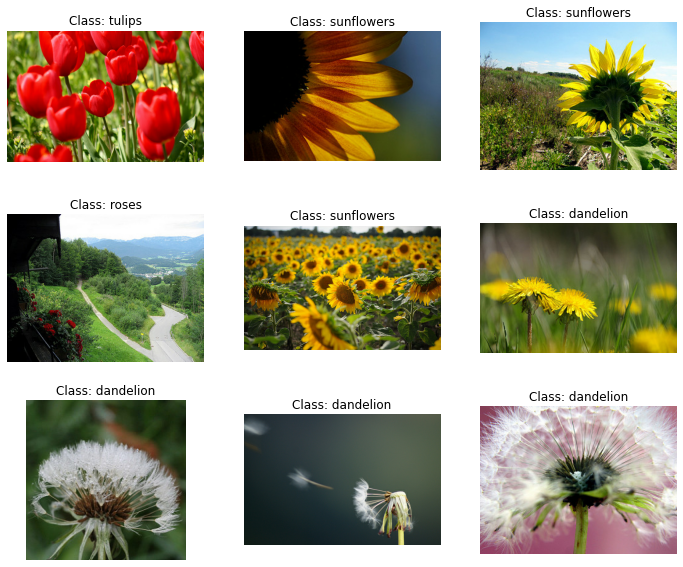

In [338]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 10))
index = 0
for image, label in raw_train.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

The CNN expects $224\times 224$ dimensional input images, and if you look above you'll notice that not all of the images are the same size. Our solution will be to crop the images down to size using `tf.image.resize`. We then use the `keras.applications.xception.preprocess_input` function to preprocess the pictures. A preprocessing function often accompanies a pretrained network and it used to put the input into the format the network expects. For example, some networks expect greyscale images, some networks expect image scaled between [0,1], other between [-1,1], others use centered images that are otherwise not normalized. 

There are a lot more data augmentation steps we could add to our preprocessing pipeline, including taking random cropings off our image, rotating, flipping or scaling the image. This is often helpful when you have a small training dataset. I will hold off on other preprocessing steps until the end of the lab. 

In [339]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

To apply our preprocessing function to the data we need to use the `DatasetV1Adapter.map(func)` command. This will apply the function `func` to each element of the `DatasetV1Adapter` object. We then shuffle the data, split it into batches for training. Finally, we tell Python to __prefetch__ the data. Prefetching loads the data into memory now and stores it there. Otherwise, Python may try to intelligently allocate the resources by only loading images when they are needed. This will drastically slow down training

In [340]:
batch_size = 32
raw_train = raw_train.shuffle(1000)
raw_train = raw_train.map(preprocess).batch(batch_size).prefetch(1)
raw_validation = raw_validation.map(preprocess).batch(batch_size).prefetch(1)
raw_test = raw_test.map(preprocess).batch(batch_size).prefetch(1)

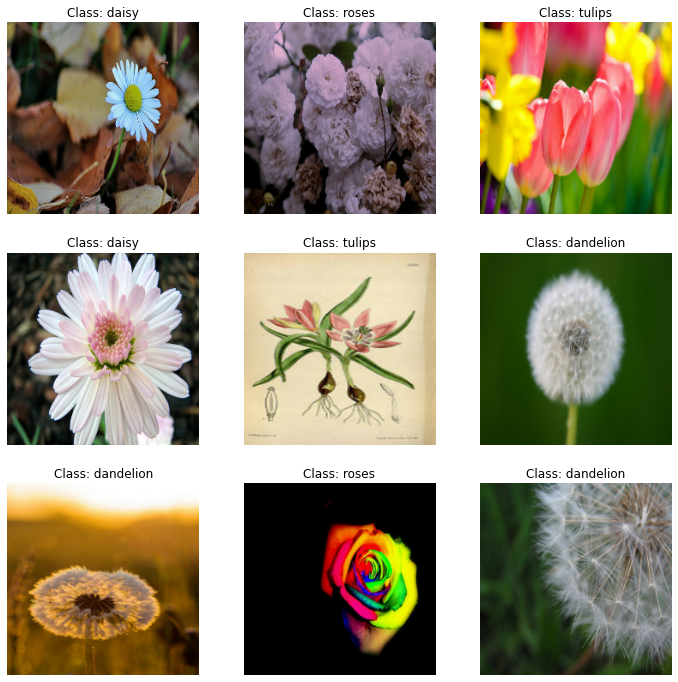

In [341]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in raw_train.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

Now we want to load the the Xception model and change it output dimension. We set `include_top=False` to remove the last two layers of the network: the global pooling layer and it's dense connection to the output layer. We will replace them with our own global pooling layer and output to our 5 classes. 

For Keras, since we're not using a sequential network, when we add new layers we just have to tell the network which outputs to connect them to. This is done via

    NewLayer = tf.keras.layers.LAYERTYPE(Parameters)(OldLayer)
    
Using this syntax, we add a __global pooling layer__ and a __dense layer__ with 5 outputs, one for each class. 

Note: The use of `tf.keras` forces keras to use the version compatible with the Tensorflow 2.0.0 backend, otherwise you will have errors. 

In [342]:
raw_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [343]:
n_classes = len(class_names)

base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                           

Finally, at first we don't want to train the all 20,871,725 parameters of the model, so we will freeze all of the layers we borrowed from Xception and only keep the weights of the last dense layer as trainable. 

In [344]:
for layer in base_model.layers:
    layer.trainable = False

### Lets train the model. On a CPU it will take around 20 minutes per epoch.

In [345]:
optimizer = tf.keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(raw_train, epochs=5, validation_data=raw_validation)

Epoch 1/5


C:\Users\Noah\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


92/92 [==============================] - 490s 5s/step - loss: 1.4749 - accuracy: 0.7875 - val_loss: 0.6108 - val_accuracy: 0.9046
Epoch 2/5
92/92 [==============================] - 498s 5s/step - loss: 0.4520 - accuracy: 0.9125 - val_loss: 0.4654 - val_accuracy: 0.9101
Epoch 3/5
92/92 [==============================] - 491s 5s/step - loss: 0.2160 - accuracy: 0.9428 - val_loss: 0.4384 - val_accuracy: 0.9074
Epoch 4/5
92/92 [==============================] - 496s 5s/step - loss: 0.1230 - accuracy: 0.9625 - val_loss: 0.3722 - val_accuracy: 0.9155
Epoch 5/5
92/92 [==============================] - 490s 5s/step - loss: 0.0903 - accuracy: 0.9731 - val_loss: 0.3826 - val_accuracy: 0.9183


After 5 epochs our model is doing fairly well. If you would like you can now unfreeze the upper layers and have them train too. This will take a while but you can actually acheave accuray of up to 95%. Not bad for an afternoons work.

##### More pretrained models https://keras.io/api/applications/

# Problem 1: CNN classificaiton

###### Construct a CNN to classify the images in the MRI dataset. 

In [346]:
### Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist, fashion_mnist
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from scipy import ndimage

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D 

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [347]:
# Data:
file_dir = 'C:/python/ML Lab2/MRI_Images/MRI_Images/'
labels = pd.read_csv(file_dir + 'labels.csv')

DID NOT USE THIS

DS = 8 # Downsample rate, must be a multiple of 30976
if 30976/DS % 1 > 0:
 print("Downsample rate is not a multiple of 30976")
 DS = 1
 im_size = 30976
else:
 im_size = int(30976/DS)
data = np.zeros([609, im_size])
for i, file_name in enumerate(labels.Filename):
 img = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)
 data[i,:] = img[::DS] # Downsample the image
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 176, 176, 1)
X_test = X_test.reshape(-1, 176, 176, 1)
Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)

 
Below one used

In [348]:
data = np.array([mpl.image.imread(file_dir + file_name)[:, :, :3] for i, file_name in enumerate(labels.Filename)])

In [349]:
### train test split
Train_size = 486
y_data = labels['nWBV']
x_train, x_test, y_train, y_test = train_test_split(data, y_data, train_size = Train_size, random_state = 255)

In [350]:
##normalizing the data/add dimensions
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

NUM_LABELS = len(np.unique(y_data))
X_train = x_train.reshape(-1,176,176,3)
X_test = x_test.reshape(-1,176,176,3)

Y_train = np_utils.to_categorical(y_train, NUM_LABELS)
Y_test = np_utils.to_categorical(y_test, NUM_LABELS)
print(X_train.shape)
print(Y_train.shape)

(486, 176, 176, 3)
(486, 123)


### Model
model = Sequential()

model.add(Conv2D(32, (7,7), padding='valid', input_shape=(176, 176,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=NUM_LABELS, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

print(model.summary())

In [351]:
model = Sequential()

model.add(Conv2D(32, (7,7), padding='valid', input_shape=(176, 176,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=NUM_LABELS, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 170, 170, 32)      4736      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 83, 83, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 41, 41, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 53792)            

In [352]:
epochs = 5
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=128,verbose=1,validation_data=(X_test, Y_test))

Epoch 1/5
4/4 [==============================] - 43s 8s/step - loss: 2.0897 - accuracy: 0.7366 - val_loss: 2.8624e-04 - val_accuracy: 1.0000
Epoch 2/5
4/4 [==============================] - 27s 7s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 3.3943e-05 - val_accuracy: 1.0000
Epoch 3/5
4/4 [==============================] - 27s 7s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.1454e-05 - val_accuracy: 1.0000
Epoch 4/5
4/4 [==============================] - 27s 7s/step - loss: 6.4890e-04 - accuracy: 1.0000 - val_loss: 4.8246e-06 - val_accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 27s 7s/step - loss: 6.3542e-04 - accuracy: 1.0000 - val_loss: 1.8560e-06 - val_accuracy: 1.0000


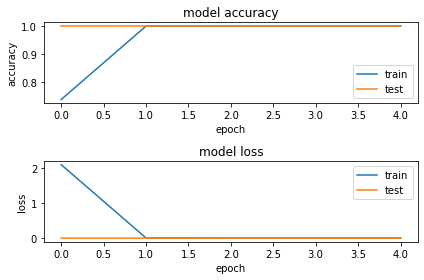

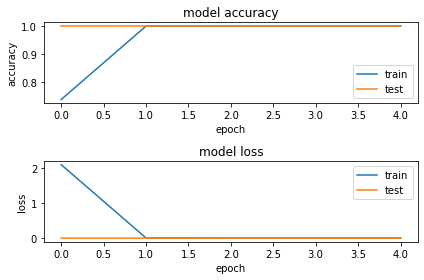

In [353]:
# plotting
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# Problem 2: Pretrained Networks



##### Construct a CNN using the Pretrained Network to classify the images in the MRI dataset.

In [354]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.10.0'

Final image and label

In [355]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224,224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

train and test

In [356]:
raw_train = tf.data.Dataset.from_tensor_slices((X_train,Y_train))
raw_test = tf.data.Dataset.from_tensor_slices((X_test,Y_test))

In [357]:
batch_size = 32
raw_train = raw_train.shuffle(1000)
raw_train = raw_train.map(preprocess).batch(batch_size).prefetch(1)
raw_test = raw_test.map(preprocess).batch(batch_size).prefetch(1)

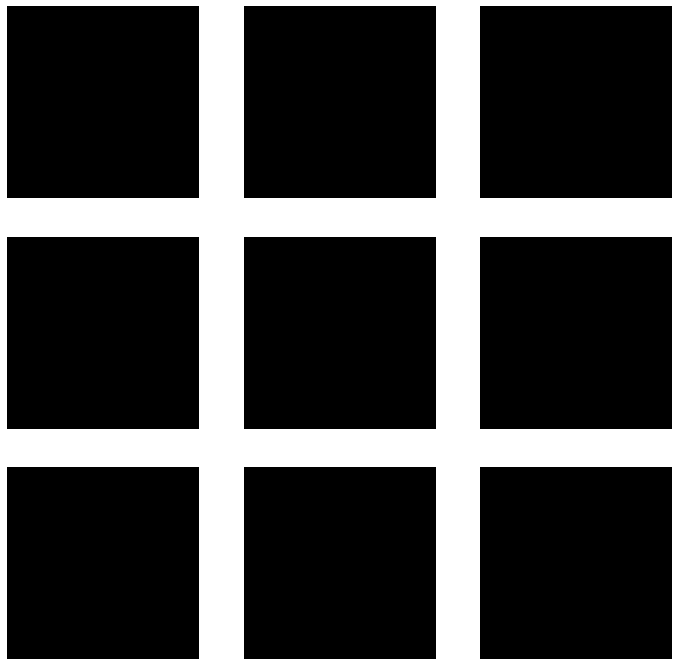

In [358]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in raw_train.take(1):
 for index in range(9):
     plt.subplot(3, 3, index + 1)
     plt.imshow(X_batch[index] / 2 + 0.5)
     plt.axis("off")


In [359]:
raw_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 123), dtype=tf.float32, name=None))>

In [360]:
n_classes = len(class_names)

base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [361]:
for layer in base_model.layers:
 layer.trainable = False

In [365]:
### epoch save run time
optimizer = tf.keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(raw_train, epochs=1, validation_data=raw_test)

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\Noah\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Noah\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Noah\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Noah\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Noah\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Noah\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Noah\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Noah\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Noah\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Noah\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\Noah\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\Noah\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\Noah\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\Noah\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Noah\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Noah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\Noah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\Noah\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Noah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Noah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Noah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Noah\AppData\Local\Temp\ipykernel_5488\3285508762.py", line 4, in <cell line: 4>
      history = model.fit(raw_train, epochs=1, validation_data=raw_test)
    File "C:\Users\Noah\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Noah\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Noah\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Noah\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Noah\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Noah\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Noah\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Noah\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Noah\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Noah\anaconda3\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Noah\anaconda3\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\Noah\anaconda3\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [32,5] and labels shape [3936]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_641529]